In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import warnings

# MAchine learning models 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier

# model selection & tuning
from sklearn.model_selection import train_test_split, GridSearchCV , RandomizedSearchCV
from scipy.stats import uniform, randint

#Evaluation metrics 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# sampling methods 

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Pipelines
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.pipeline import Pipeline as SklearnPipeline

# Feature selection 
from sklearn.feature_selection import RFE , SelectKBest, f_classif

## Import Dataset

In [90]:
datafile = fr"C:\BKP\Learning\MLOPS\Diabetes-Health-Indicators\zipfiles\diabetes_binary_5050split_health_indicators_BRFSS2015.csv"
df = pd.read_csv(datafile)
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


The selected features from the BRFSS 2015 dataset are (Description --> column name):
-----------------------------------------------------
Response Variable / Dependent Variable:

Whether you have diabetes  --> Diabetes_binary

Independent Variables:

** Adults having high blood pressure --> HighBP
** Adults having blood cholesterol is high? --> HighChol
** Cholesterol check within past five years --> CholCheck
** Body Mass Index (BMI) --> BMI
** Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] --> Smoker
** Whether you had a stroke. --> Stroke
** Have coronary heart disease (CHD) or myocardial infarction (MI) --> HeartDiseaseorAttack
** Adults doing physical activity or exercise during the past 30 days other than their regular job --> PhysActivity
** Consume Fruit 1 or more times per day --> Fruits
** Consume Vegetables 1 or more times per day --> Veggies
** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) --> HvyAlcoholConsump
** Have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? --> AnyHealthcare
** Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? --> NoDocbcCost
** Would you say that in general your health is(1 is Excellent -> 5 is Poor): --> GenHlth
** About mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? --> MentHlth
** About your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? --> PhysHlth
** Do you have serious difficulty walking or climbing stairs? --> DiffWalk
** Indicate sex of respondent. --> Sex
** Fourteen-level age category --> Age
** What is the highest grade or year of school you completed?(1 being never attended school or kindergarten only up to 6 being college 4 years or more) --> Education
** Is your annual household income from all sources: (1 being less than $10,000 all the way up to 8 being $75,000 or more) --> Income

In [5]:
df.shape

(70692, 22)

In [7]:
# checking for null values
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

In [11]:
df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,70692.0,0.500000,0.500004,0.0,0.0,0.5,1.0,1.0
HighBP,70692.0,0.563458,0.495960,0.0,0.0,1.0,1.0,1.0
HighChol,70692.0,0.525703,0.499342,0.0,0.0,1.0,1.0,1.0
CholCheck,70692.0,0.975259,0.155336,0.0,1.0,1.0,1.0,1.0
BMI,70692.0,29.856985,7.113954,12.0,25.0,29.0,33.0,98.0
Smoker,70692.0,0.475273,0.499392,0.0,0.0,0.0,1.0,1.0
Stroke,70692.0,0.062171,0.241468,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,70692.0,0.147810,0.354914,0.0,0.0,0.0,0.0,1.0
PhysActivity,70692.0,0.703036,0.456924,0.0,0.0,1.0,1.0,1.0
Fruits,70692.0,0.611795,0.487345,0.0,0.0,1.0,1.0,1.0


## checking distribution for target column

In [13]:

target = 'Diabetes_binary'

print(df[target].value_counts().sort_index())

print(df[target].value_counts(normalize= True).sort_index().map(lambda x: f'{x : .3%}'))

Diabetes_binary
0.0    35346
1.0    35346
Name: count, dtype: int64
Diabetes_binary
0.0     50.000%
1.0     50.000%
Name: proportion, dtype: object


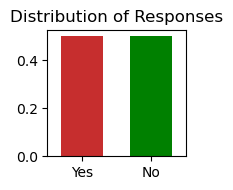

In [23]:
value_counts = df[target].value_counts(normalize= True).sort_index()
labels = ['No', 'Yes']
x_pos = [0.75, 0.25]
colors = ['#008000' , '#C62E2E']
plt.figure(figsize=(2, 2))

# Create the bar plot
#value_counts.plot(kind='bar',color='#0D92F4')
plt.bar(x_pos, value_counts, width=0.3, color=colors)

# Customize the plot (optional)
plt.xticks(x_pos, labels)
plt.title('Distribution of Responses')

plt.xlim(0, 1)

# Show the plot
plt.tight_layout()
plt.show()

## Checking distribution of other columns

In [14]:
# assigning two list for binary columns and num columns

binary_col = [col for col in df.columns if df[col].nunique() == 2 and col != target]

num_col = [col for col in df.columns.difference(binary_col) if col != target]
print('Binary Columns: ', binary_col)
print('Numerical Columns: ', num_col)

Binary Columns:  ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
Numerical Columns:  ['Age', 'BMI', 'Education', 'GenHlth', 'Income', 'MentHlth', 'PhysHlth']


HighBP
0.0    30860
1.0    39832
Name: count, dtype: int64



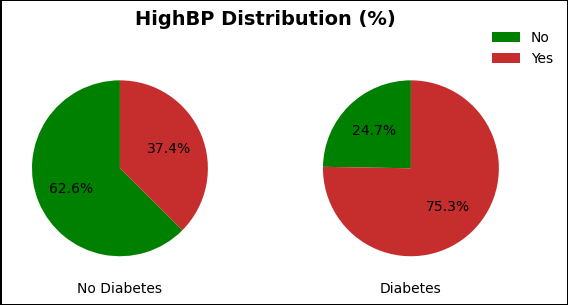


HighChol
0.0    33529
1.0    37163
Name: count, dtype: int64



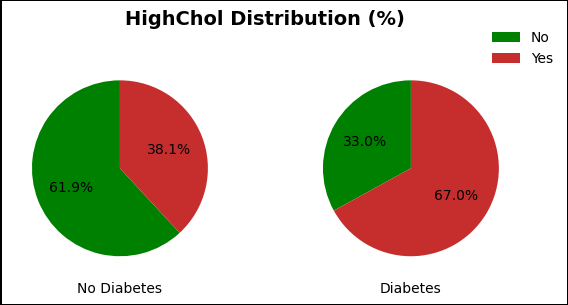


CholCheck
0.0     1749
1.0    68943
Name: count, dtype: int64



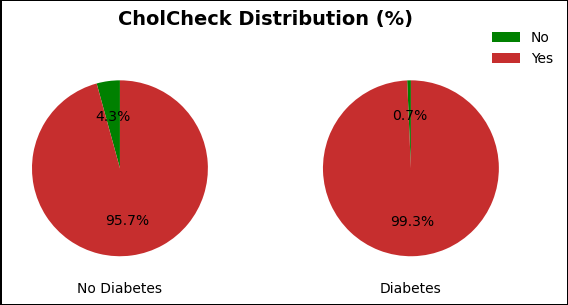


Smoker
0.0    37094
1.0    33598
Name: count, dtype: int64



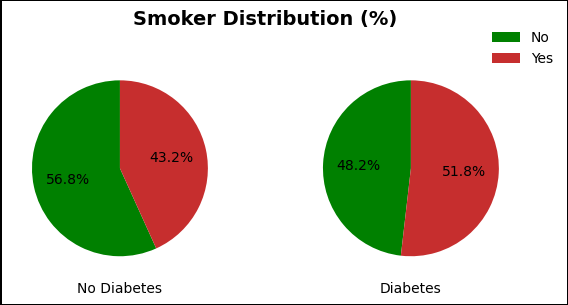


Stroke
0.0    66297
1.0     4395
Name: count, dtype: int64



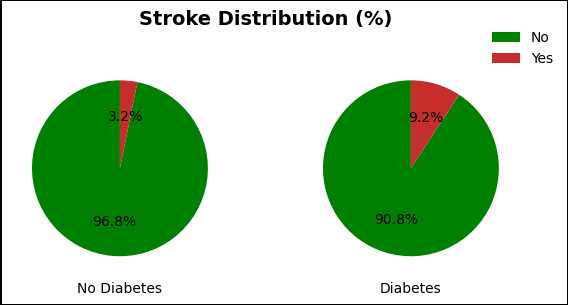


HeartDiseaseorAttack
0.0    60243
1.0    10449
Name: count, dtype: int64



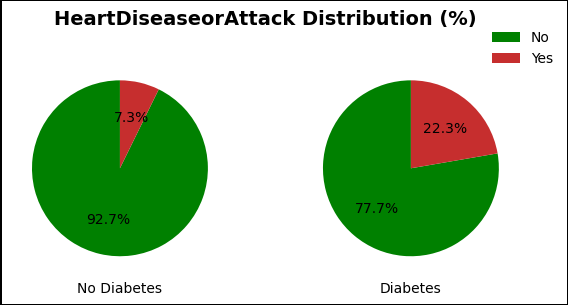


PhysActivity
0.0    20993
1.0    49699
Name: count, dtype: int64



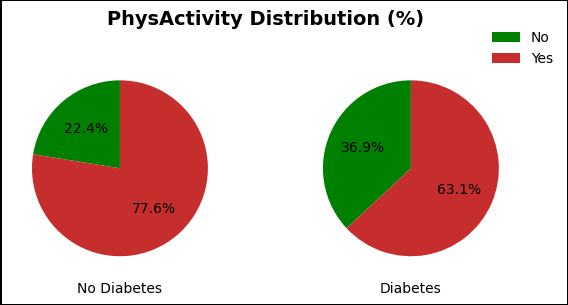


Fruits
0.0    27443
1.0    43249
Name: count, dtype: int64



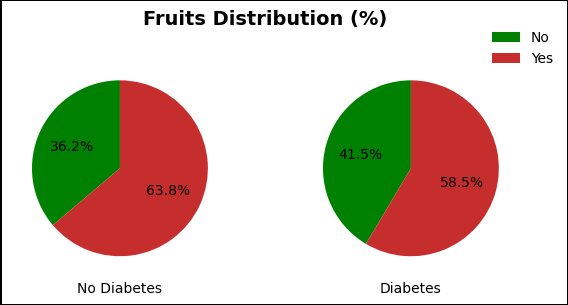


Veggies
0.0    14932
1.0    55760
Name: count, dtype: int64



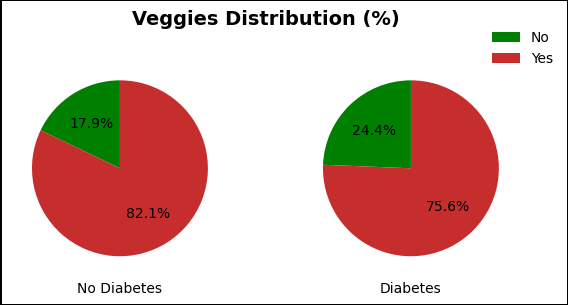


HvyAlcoholConsump
0.0    67672
1.0     3020
Name: count, dtype: int64



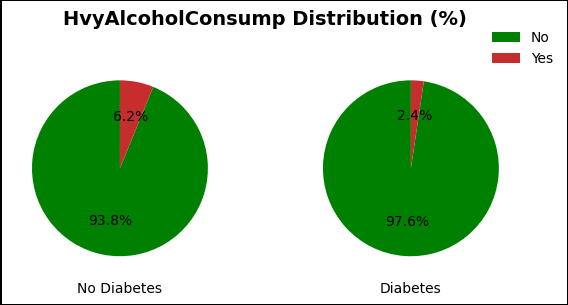


AnyHealthcare
0.0     3184
1.0    67508
Name: count, dtype: int64



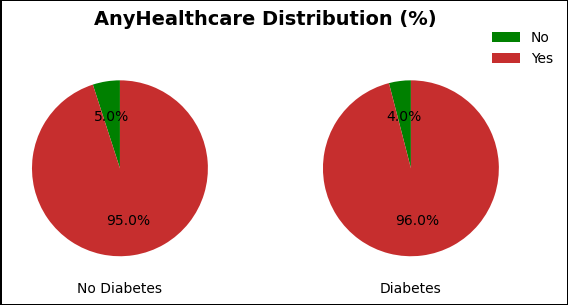


NoDocbcCost
0.0    64053
1.0     6639
Name: count, dtype: int64



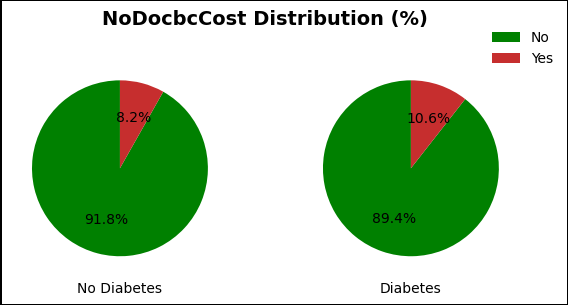


DiffWalk
0.0    52826
1.0    17866
Name: count, dtype: int64



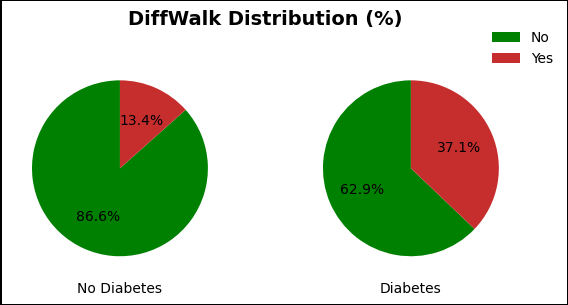


Sex
0.0    38386
1.0    32306
Name: count, dtype: int64



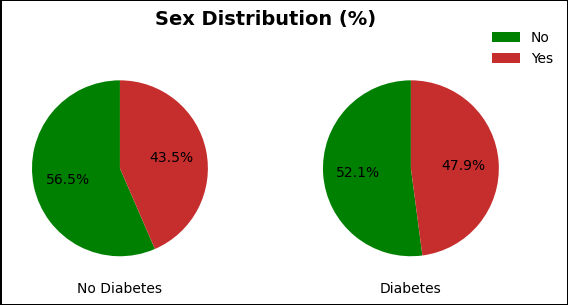

In [28]:
## first binary columns
## Define function for creating a pie chart for binary variables

def binary_var_pie(var):
    
    # Group the data
    grouped = df.groupby([target, var]).size().unstack()
    
    # Label the binary variable to blue if No, red if Yes
    labels = ['No', 'Yes']
    colors = ['#008000' , '#C62E2E']
    
    # Create space (1 row * 2 columns) for pie charts
    fig, axes = plt.subplots(1, 2, figsize=(6, 3))
    
    # Pie chart for no diabetes
    axes[0].pie(grouped.iloc[0], colors=colors, autopct='%.1f%%', startangle=90)
    axes[0].set_xlabel('No Diabetes', fontsize=10, labelpad=2)
    
    # Pie chart for diabetes
    axes[1].pie(grouped.iloc[1], colors=colors, autopct='%.1f%%', startangle=90)
    axes[1].set_xlabel('Diabetes', fontsize=10, labelpad=2)
    
    # Add a main title
    plt.suptitle(f'{var} Distribution (%)', fontsize=14, fontweight='bold')
    
    # Create a legend elements
    legend_elements = [
        Patch(facecolor=colors[0], label=labels[0]),
        Patch(facecolor=colors[1], label=labels[1])
    ]
    
    # Add a legend
    fig.legend(handles=legend_elements,loc='upper right',bbox_to_anchor=(1, 0.95),frameon=False)

    # Add a box around the entire figure
    fig.patch.set_edgecolor('black')
    fig.patch.set_linewidth(1)
    
    plt.tight_layout(pad=1.3)
    plt.show()

# Create the pie charts
for col in binary_col:
    print(df[col].value_counts(sort = False).sort_index())
    print()
    binary_var_pie(col)
    print()

### overview of numerical variables

In [30]:
print(f'Number of unique values:')
print(df[num_col].nunique())

Number of unique values:
Age          13
BMI          80
Education     6
GenHlth       5
Income        8
MentHlth     31
PhysHlth     31
dtype: int64


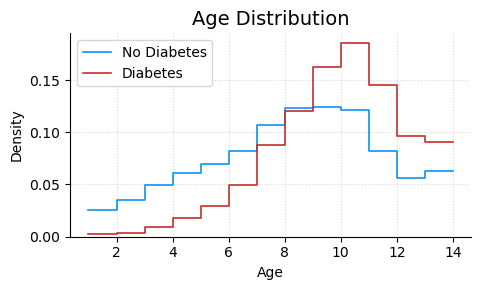

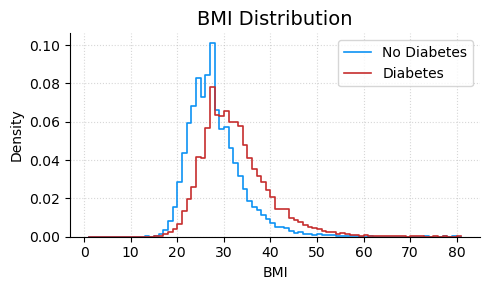

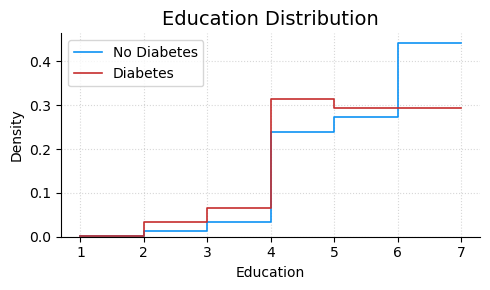

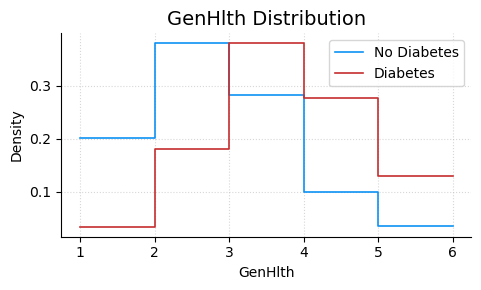

C:\Users\dell\AppData\Local\Temp\ipykernel_20560\2282260861.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


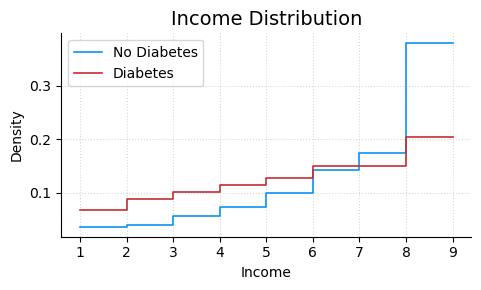

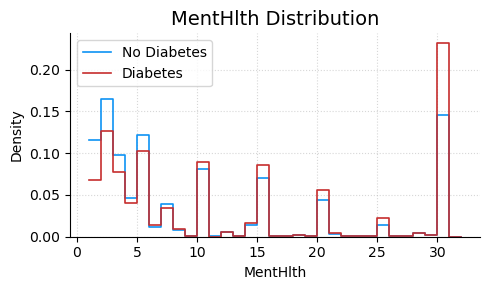

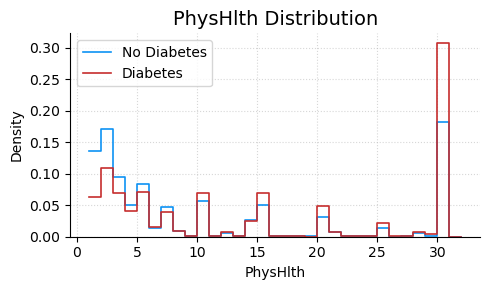

In [31]:
# Define function for creating a histogram for numerical variable

def num_var_line(var):

    # Count the number of unique values
    num_unique_vals = df[var].nunique()
    
    # Seperate numerical variables by diabetes status
    num_var_no = df[df[target] == 0][var]
    num_var_yes = df[df[target] == 1][var]
    
    # Create plot space
    plt.figure(figsize=(5, 3))
    
    # Plot histogram for no diabetes and diabetes
    # while suppressing future warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore", category=FutureWarning)
        sns.histplot(num_var_no, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='No Diabetes',
                     color='#0D92F4',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.histplot(num_var_yes, stat='density',
                     bins=range(1, num_unique_vals+2),
                     label='Diabetes',
                     color='#C62E2E',
                     linewidth=1.2,
                     element='step',
                     fill=False
                    )
        sns.despine()
    # Format the plot
    plt.title(f'{var} Distribution', fontsize=14)
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Density', fontsize=10)
    
    # Remove top and right spines
    #plt.gca().spines[['top', 'right']].set_visible(False)
    
    # Add grid lines and legend
    plt.grid(axis='both', linestyle=':', alpha=0.5)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

for col in num_col:
    num_var_line(col)

### Check for correlations between variables

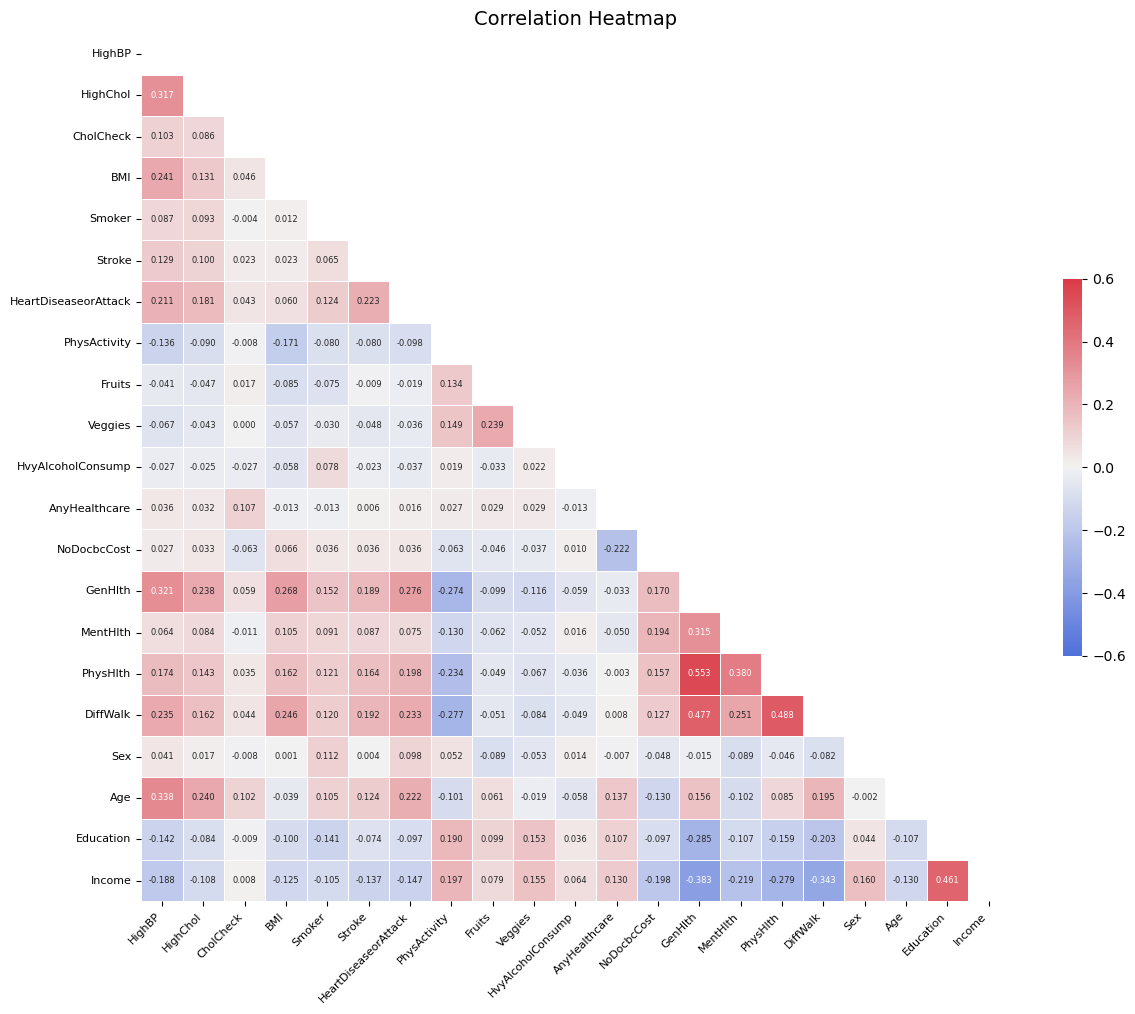

In [33]:

# Generate a correlation matrix
df_feat = df.drop(target,axis=1)
corr = df_feat.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up plot figure
f, ax = plt.subplots(figsize=(14, 14))

# Generate a diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)

# Draw the heatmap with the upper diagonal removed
# and the values displayed in the cells
heatmap = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    annot_kws={"size": 6},
    fmt='.3f',
    vmax=0.6,
    vmin=-0.6,
    square=True,
    linewidths=0.5,
    cbar_kws={'shrink': 0.35}
)

# Set title
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 14})
ax.tick_params(axis='both', labelsize=8)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right');

### Correlation with Response

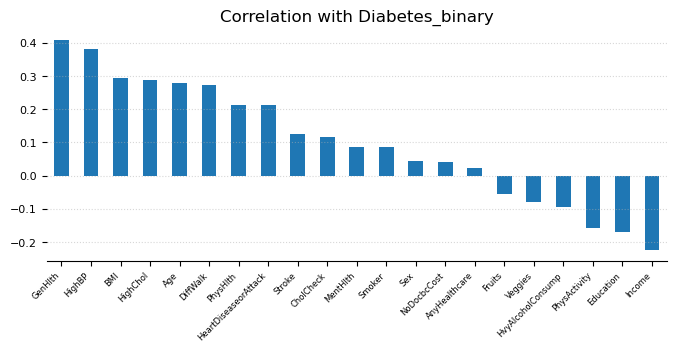

In [35]:
# Correlation with the target variable (Diabetes_binary)

# Create an array of correlation between target variables and others
# sorted in descending order
corr = df.corr()
corr_target = corr[target].drop(target).sort_values(ascending=False)

# Create a bar graph
corr_target_graph = corr_target.plot(kind='bar', figsize=(8, 3))

# Set the title and change the font size of y labels
corr_target_graph.set_title('Correlation with Diabetes_binary', fontsize=12)
corr_target_graph.tick_params(axis='y', labelsize=8)

# Remove the spines of top, left and right
corr_target_graph.spines[['top', 'left', 'right']].set_visible(False)

# Add horizontal grids
plt.grid(axis='y', linestyle=':', alpha=0.5)

# Rotate the x labes
plt.xticks(rotation = 45, ha='right', size=6);

### handle outliers
   Outliers are generally those values which are far away from the mean of the feature. Normally we calculate by using Q1(first quantile) and Q3 (Third quantile). Here we are taking those values which are more than 1.5*(Q3 - Q1) from either of Q1 or Q3 as outliers.

In [65]:
# Define a function to find outliers in a given column
def find_outliers_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    # Filter only outlier rows
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    
    return outliers

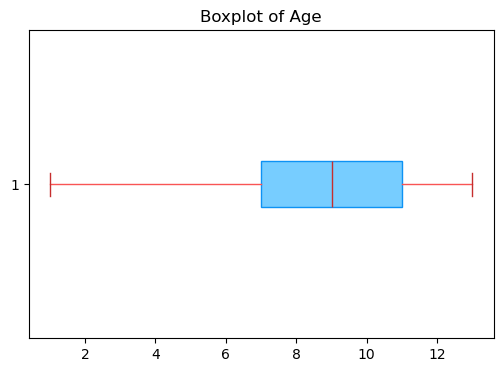

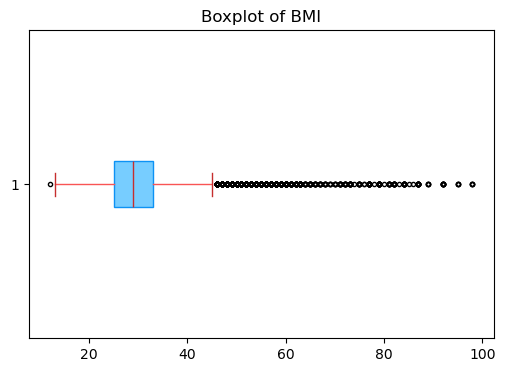

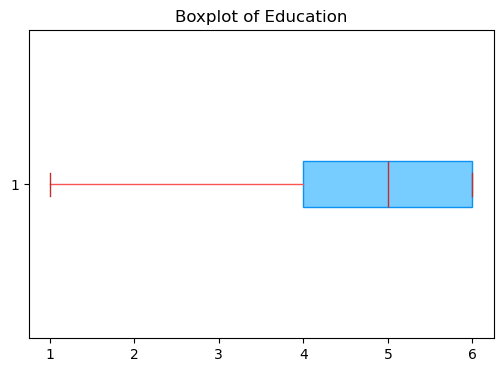

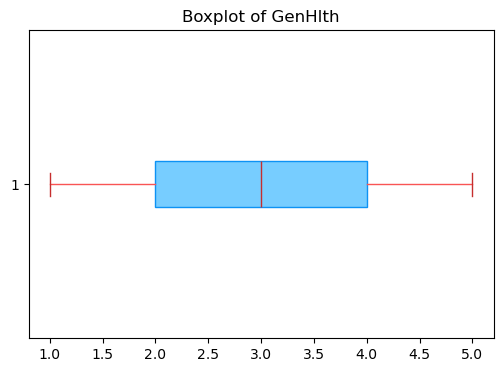

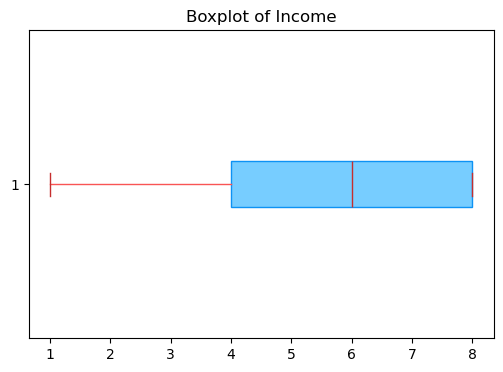

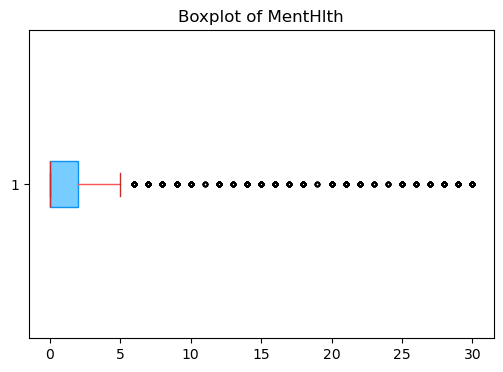

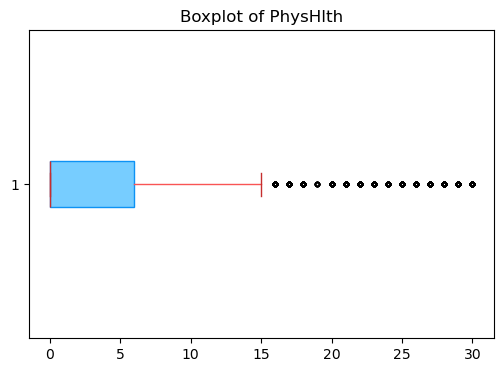

In [38]:
# Define function for creating boxplot and check all the features having outliers
def plot_boxplot(df, col):
    plt.figure(figsize=(6, 4))
    plt.boxplot(
        df[col], 
        vert=False,
        patch_artist=True,
        boxprops=dict(facecolor='#77CDFF', color='#0D92F4'),
        medianprops=dict(color='#C62E2E'),
        whiskerprops=dict(color='#F95454'),
        capprops=dict(color='#C62E2E'),
        flierprops=dict(marker='o', color='#536493', markersize=3)
    )
    plt.title(f'Boxplot of {col}')

# Boxplot of numerical variables
for col in num_col:
    plot_boxplot(df, col)

In [48]:
# Outliers can be found for BMI,PhysHlth and MentHlth
## for BMI
df_outlier_BMI = find_outliers_iqr(df, 'BMI')
print(f'<Mean values of BMI>')
print(df['BMI'].mean())

# Explore outlier rows
print(df_outlier_BMI['BMI'].value_counts().sort_index())
print()
## for PhysHlth
df_outlier_PH = find_outliers_iqr(df, 'PhysHlth')
print(f'<Mean values of PhysHlth>')
print(df['PhysHlth'].mean())
# Explore outlier rows
print(df_outlier_PH['PhysHlth'].value_counts().sort_index())
print()

## for MentHlth
df_outlier_MH = find_outliers_iqr(df, 'MentHlth')
print(f'<Mean values of MentHlth>')
print(df['MentHlth'].mean())
# Explore outlier rows
print(df_outlier_MH['MentHlth'].value_counts().sort_index())

<Mean values of BMI>
29.856985231709388
BMI
12.0      1
46.0    359
47.0    272
48.0    236
49.0    195
50.0    195
51.0    122
52.0    111
53.0    109
54.0     57
55.0     79
56.0     50
57.0     37
58.0     44
59.0     25
60.0     29
61.0     20
62.0     18
63.0     20
64.0      9
65.0     11
66.0      9
67.0      8
68.0      7
69.0      4
70.0      5
71.0      9
72.0      9
73.0     12
74.0      1
75.0      9
76.0      2
77.0     18
78.0      1
79.0     17
80.0      1
81.0      9
82.0     11
83.0      1
84.0     13
85.0      1
86.0      1
87.0     13
89.0      4
92.0      9
95.0      4
98.0      4
Name: count, dtype: int64

<Mean values of PhysHlth>
5.810417020313473
PhysHlth
16.0      50
17.0      35
18.0      50
19.0      10
20.0    1292
21.0     229
22.0      31
23.0      27
24.0      24
25.0     557
26.0      26
27.0      34
28.0     211
29.0      95
30.0    7953
Name: count, dtype: int64

<Mean values of MentHlth>
3.7520370056017653
MentHlth
6.0      288
7.0      825
8.0      1

Lower Bound: 13.0
Upper Bound: 45.0
Lower Bound: -9.0
Upper Bound: 15.0
Lower Bound: -3.0
Upper Bound: 5.0


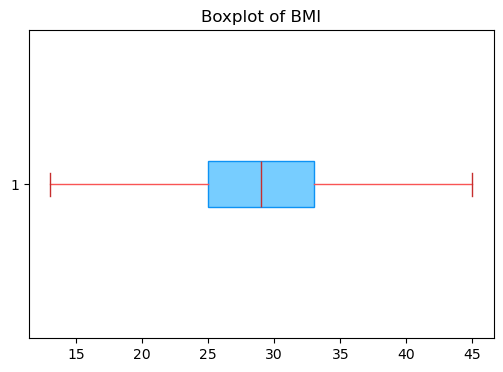

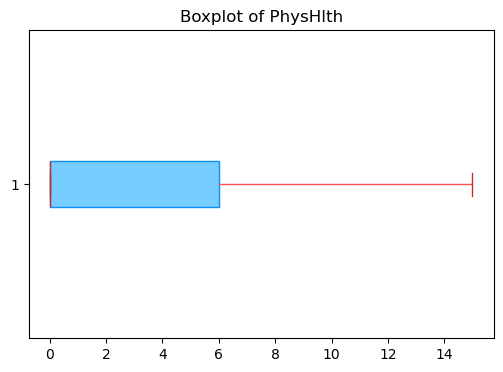

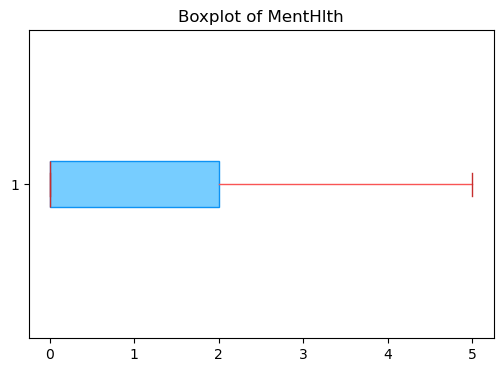

In [91]:
## Use winzorise to set upper limit and lower limit for the outliers of these three columns
# Define a function to winzorize outliers
def winsorize_iqr(df, col, k=1.5):

    # Set the lower quartile and the upper quartile
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    # Set the lower bound and upper bound
    # Based on IQR and parameter k
    IQR = Q3 - Q1
    lower_bound = Q1 - k * IQR
    upper_bound = Q3 + k * IQR

    print('Lower Bound:', lower_bound)
    print('Upper Bound:', upper_bound)

    # Replace values below/above the bounds with the boundary values
    return df[col].clip(lower=lower_bound, upper=upper_bound)

df['BMI'] = winsorize_iqr(df, 'BMI')
df['PhysHlth'] = winsorize_iqr(df, 'PhysHlth')
df['MentHlth'] = winsorize_iqr(df, 'MentHlth')
# Boxplot of winsorized BMI
plot_boxplot(df, 'BMI')
plot_boxplot(df, 'PhysHlth')
plot_boxplot(df, 'MentHlth')

In [89]:
df.head(5)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,-0.579714,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.146304,0.153020,2.404008,0.0,1.0,-1.607237,1.048562,1.05816
1,0.0,1.0,1.0,1.0,-0.579714,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.146304,-0.460058,-0.577451,0.0,1.0,1.197681,1.048562,1.05816
2,0.0,0.0,0.0,1.0,-0.579714,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-1.649743,-0.460058,0.416369,0.0,1.0,1.548296,1.048562,1.05816
3,0.0,1.0,1.0,1.0,-0.259329,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.146304,-0.460058,-0.279305,0.0,1.0,0.847066,1.048562,1.05816
4,0.0,0.0,0.0,1.0,-0.099136,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,-0.751719,-0.460058,-0.577451,0.0,0.0,-0.204778,0.076814,1.05816


### Model Building

In [92]:
# get input and target variables
independent_vars = df.drop(target , axis = 1)
dependent_var = df[target]

In [93]:
#define a function to run the calssifcation model
def classification(model , x=independent_vars , y=dependent_var):
    
    # Split data for training and testing
    X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.1 , random_state= 25)

    # scaling the data
    ss = MinMaxScaler()
    X_train[num_col] = ss.fit_transform(X_train[num_col])

    # Train the model
    model.fit(X_train , y_train)

    # Predict the labels for the training data
    y_pred_train = model.predict(X_train)
    accuracy_train = accuracy_score(y_train , y_pred_train)

    # Predict the labels for the test data
    X_test[num_col] = ss.transform(X_test[num_col])
    y_pred = model.predict(X_test)
    accuracy_test = accuracy_score(y_test , y_pred)

    # Compute additional metrics like Precision , recall , F!-score , and ROC AUC
    precision = precision_score(y_test, y_pred , zero_division = 0)
    recall = recall_score(y_test , y_pred , zero_division = 0)
    f1 = f1_score(y_test , y_pred, zero_division = 0)
    roc_auc = roc_auc_score(y_test , model.predict_proba(X_test)[:, 1])

    # Create a metrics DataFrame
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
    })
    
    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
        
    # Print the DataFrame
    print(df_metrics)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

    # Normalize by total number
    cm = cm / np.sum(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, 
                cmap="Blues", 
                fmt='.2%', 
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Return the metrics DataFrame for further use
    return df_metrics


In [94]:
# check the distribution of the training and test set
X, y = independent_vars, dependent_var

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

print('<Training Set Distribution> \n', y_train.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))
print()
print('<Test Set Distribution> \n', y_test.value_counts(normalize=True).sort_index().map(lambda x: f'{x:.2%}'))

<Training Set Distribution> 
 Diabetes_binary
0.0    49.91%
1.0    50.09%
Name: proportion, dtype: object

<Test Set Distribution> 
 Diabetes_binary
0.0    50.83%
1.0    49.17%
Name: proportion, dtype: object


  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.44%        64.94%    64.19%  64.87%   64.53%  64.91%


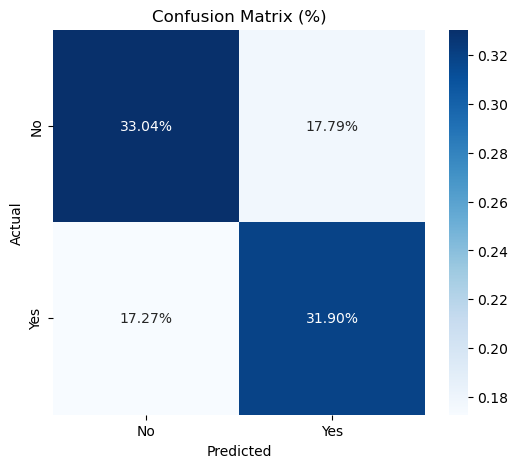

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.44%,64.94%,64.19%,64.87%,64.53%,64.91%


In [95]:
# Initialize Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=52)

classification(dt_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.43%        73.82%    71.26%  78.34%   74.63%  81.16%


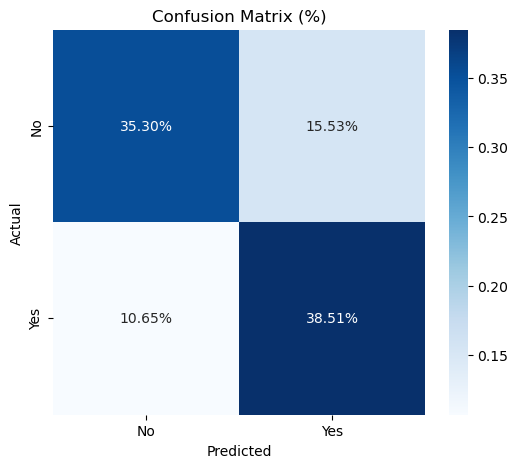

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,99.43%,73.82%,71.26%,78.34%,74.63%,81.16%


In [96]:
# Initialize Random Forest model

rnf_clf = RandomForestClassifier(random_state=52)

classification(rnf_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            75.04%        75.36%    73.38%  78.28%   75.75%  83.16%


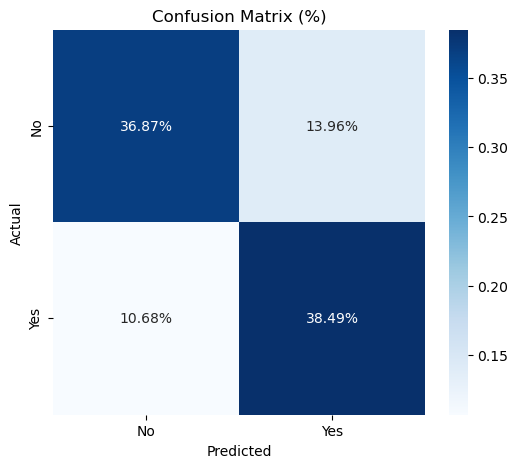

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,75.04%,75.36%,73.38%,78.28%,75.75%,83.16%


In [97]:
# Initialize AdaBoost Classifier

ada_clf = AdaBoostClassifier(random_state = 52)

classification(ada_clf)

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            75.56%        75.56%    72.86%  80.15%   76.33%  83.40%


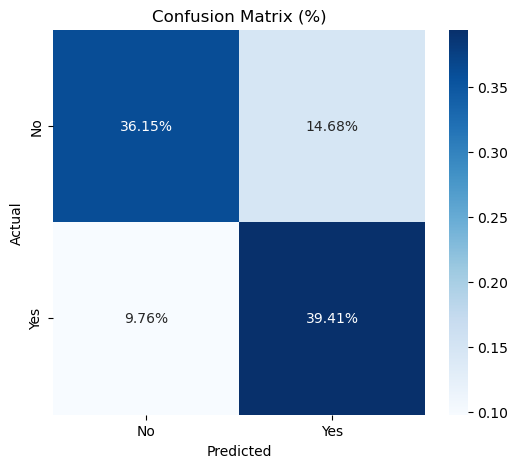

,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,75.56%,75.56%,72.86%,80.15%,76.33%,83.40%


In [72]:
gbrt = GradientBoostingClassifier(random_state = 52)

classification(gbrt)

### FEATURE SELECTION

  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


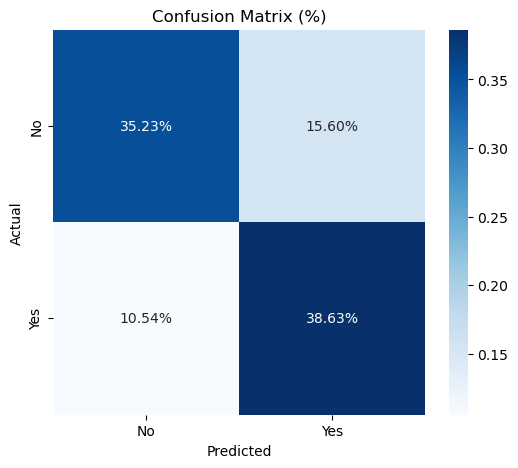

BMI                     0.169449
Age                     0.127354
GenHlth                 0.102189
Income                  0.083963
HighBP                  0.075663
PhysHlth                0.070088
Education               0.056993
MentHlth                0.052998
HighChol                0.039645
Fruits                  0.028458
Smoker                  0.028292
Sex                     0.027080
DiffWalk                0.026323
PhysActivity            0.023242
Veggies                 0.022339
HeartDiseaseorAttack    0.020114
NoDocbcCost             0.012071
Stroke                  0.010290
HvyAlcoholConsump       0.009594
AnyHealthcare           0.007710
CholCheck               0.006146
dtype: float64

In [75]:
# Initialize Random Forest Classifier (baseline) and run it
rnf_clf = RandomForestClassifier(random_state=52)
classification(rnf_clf)

# Extract feature importances from Random Forest Classifier
importances = rnf_clf.feature_importances_
feature_names = X.columns
feature_importances = pd.Series(importances, index=feature_names)

# sort feature importances and names
feature_importances_sorted = feature_importances.sort_values(ascending=False)
feature_names_sorted = feature_importances_sorted.index

feature_importances_sorted

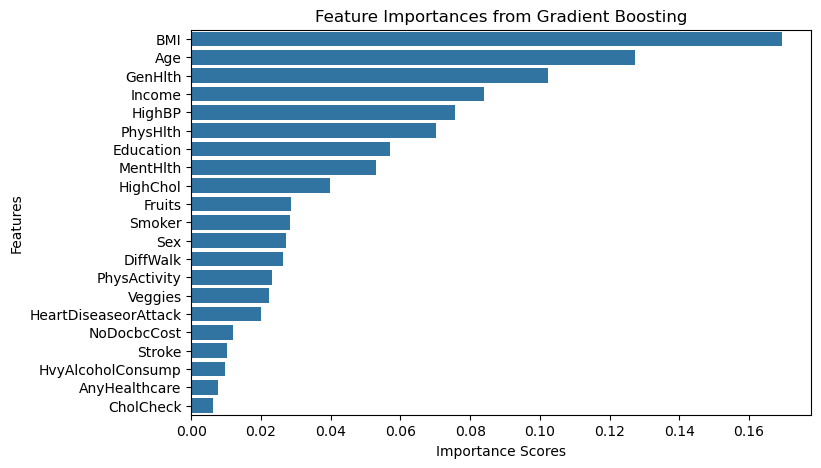

In [76]:
# Visualize the feature importances
plt.figure(figsize=(8, 5))
sns.barplot(
    x=feature_importances_sorted,
    y=feature_names_sorted
)
plt.title('Feature Importances from Gradient Boosting')
plt.xlabel('Importance Scores')
plt.ylabel('Features')
plt.show()


List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker', 'Sex', 'DiffWalk', 'PhysActivity', 'Veggies', 'HeartDiseaseorAttack', 'NoDocbcCost', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare', 'CholCheck']
Number of Features: 21
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


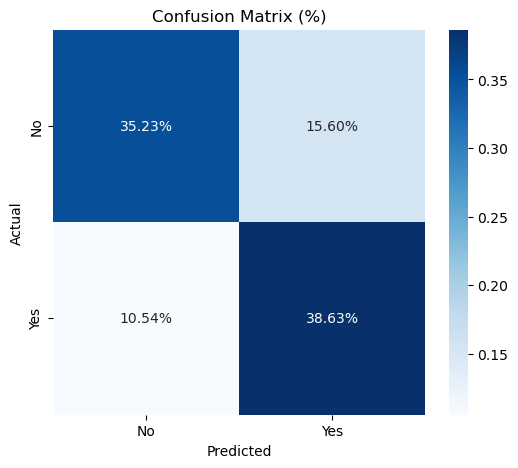

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker', 'Sex', 'DiffWalk', 'PhysActivity', 'Veggies', 'HeartDiseaseorAttack', 'NoDocbcCost', 'Stroke', 'HvyAlcoholConsump']
Number of Features: 19
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


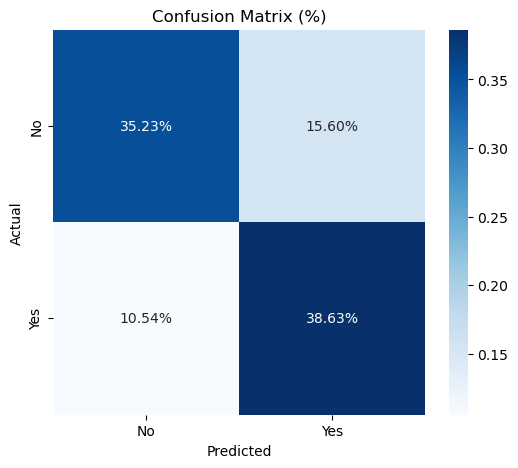

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker', 'Sex', 'DiffWalk', 'PhysActivity', 'Veggies', 'HeartDiseaseorAttack', 'NoDocbcCost']
Number of Features: 17
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


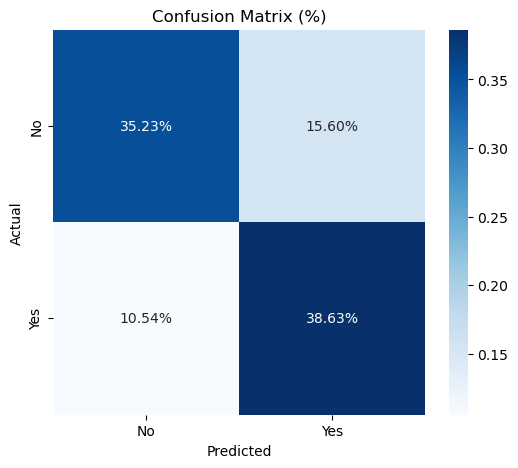

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker', 'Sex', 'DiffWalk', 'PhysActivity', 'Veggies']
Number of Features: 15
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


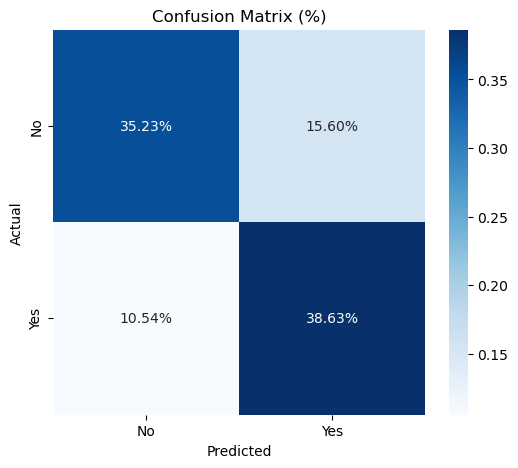

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker', 'Sex', 'DiffWalk']
Number of Features: 13
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


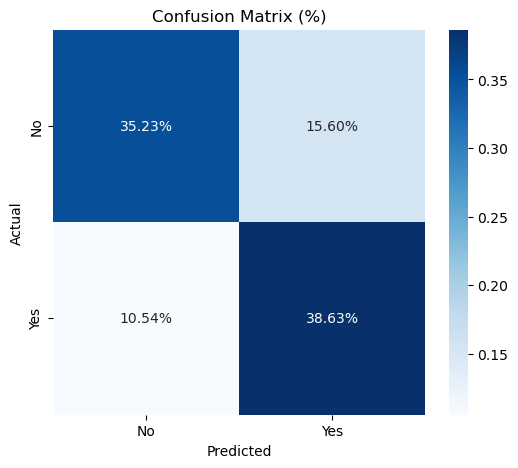

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol', 'Fruits', 'Smoker']
Number of Features: 11
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


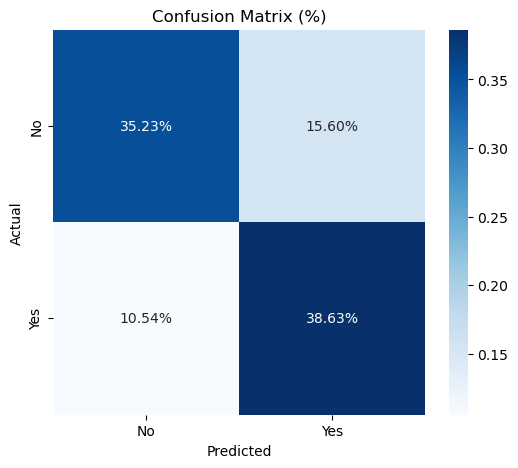

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education', 'MentHlth', 'HighChol']
Number of Features: 9
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


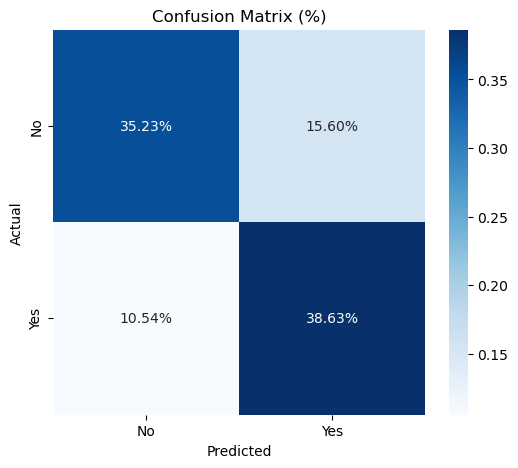

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP', 'PhysHlth', 'Education']
Number of Features: 7
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


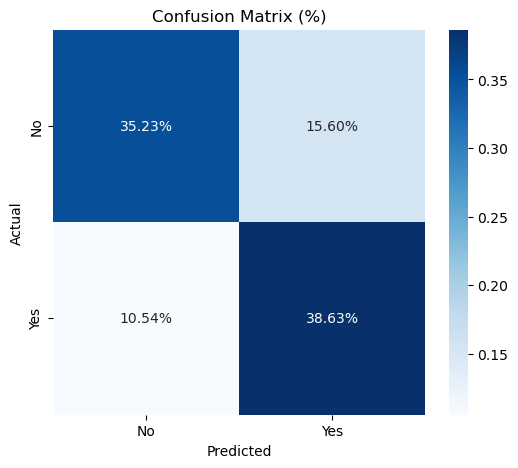

List of Features: ['BMI', 'Age', 'GenHlth', 'Income', 'HighBP']
Number of Features: 5
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


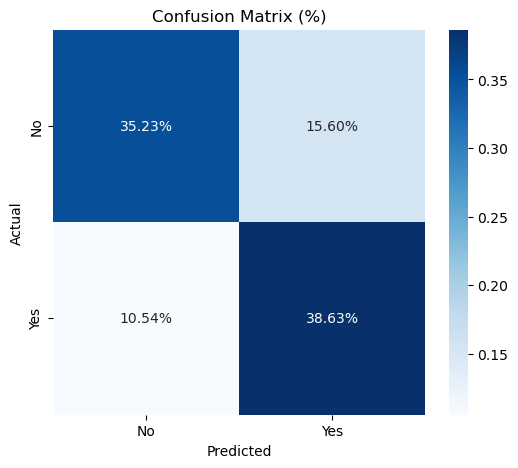

List of Features: ['BMI', 'Age', 'GenHlth']
Number of Features: 3
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


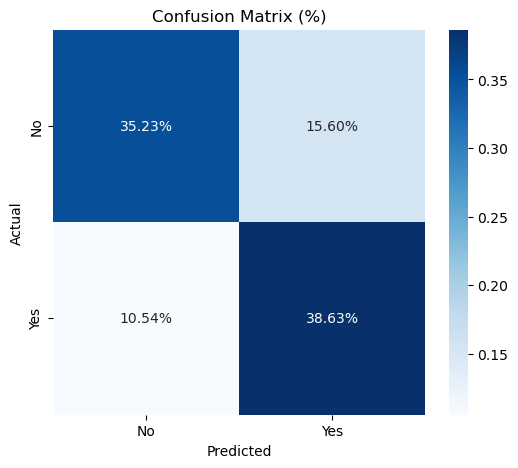

List of Features: ['BMI']
Number of Features: 1
  Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
0            99.45%        73.86%    71.23%  78.57%   74.72%  81.11%


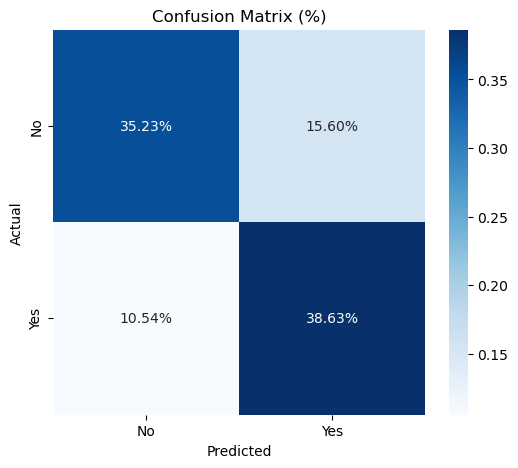

In [77]:
# Set an empty list to collect metrics DataFrame results
results_num_features = []

# Loop through until the number of features reduces to 10
for num_features in range(len(feature_names_sorted), 0, -2):

    # Select the features for analysis
    independent_vars_fi = df[feature_names_sorted[:num_features]]

    print('=' * 30)
    print('List of Features:', list(independent_vars_fi.columns))
    print('Number of Features:', num_features)

    # Initialize RandomForestClassifier in every iteration
    rnf_clf = RandomForestClassifier(random_state=52)

    # Run RandomForestClassifier
    df_metrics_num_features = classification(rnf_clf, x=independent_vars_fi)

    # Add metrics DataFrame results to the list
    df_metrics_num_features['Number of Features'] = num_features
    results_num_features.append(df_metrics_num_features)


# Combine all results into one DataFrame
df_results_num_features = pd.concat(results_num_features, ignore_index=True)

# Reorder columns
cols = ['Number of Features'] + [col for col in df_results_num_features.columns 
                                 if col != 'Number of Features']
df_results_num_features = df_results_num_features[cols]

# Save the DataFrame Results
#df_results_num_features.to_excel('Results_Number_of_Features.xlsx', index=False)
df_results_num_features.to_csv('Results_Number_of_Features.csv', index=False)

In [78]:
df_results_num_features

,Number of Features,Training Accuracy,Test Accuracy,Precision,Recall,F1-Score,ROC AUC
0,21,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
1,19,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
2,17,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
3,15,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
4,13,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
5,11,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
6,9,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
7,7,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
8,5,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%
9,3,99.45%,73.86%,71.23%,78.57%,74.72%,81.11%


### Recursive Feature Elimination

In [81]:
# Initialize a Gradient Boosting Classifier
rnf_clf = RandomForestClassifier(random_state=52)

# Run RFE using Gradient Boosting Classifier
# select 15 most important features
rfe = RFE(estimator=rnf_clf, n_features_to_select=15)
rfe.fit(X_train, y_train)

selected_features = X.columns[rfe.support_]

print('Selected Features:', list(selected_features))

Selected Features: ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']


###  Data Resampling

In [99]:
# Define a function to run the classification model with sampling
def classification_sampling(model, sampling, X=independent_vars, y=dependent_var):

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=25)

    # Define the pipeline with sampling methods
    pipeline = ImbPipeline(
        sampling + [('classifier', model)]
    )

    # scaling the data
    ss = MinMaxScaler()
    X_train[num_col] = ss.fit_transform(X_train[num_col])
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Predict the labels for the training data
    y_pred_train = pipeline.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    
    # Predict the labels for the test data
    X_test[num_col] = ss.transform(X_test[num_col])
    y_pred = pipeline.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred)

    # Compute additional metrics
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    if hasattr(pipeline.named_steps['classifier'], "predict_proba"):
        roc_auc = roc_auc_score(y_test, 
                                pipeline.predict_proba(X_test)[:, 1])
    else:
         roc_auc = None
    
    # Create a DataFrame of the metrics
    df_metrics = pd.DataFrame({
        'Training Accuracy': [accuracy_train],
        'Test Accuracy': [accuracy_test],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1],
        'ROC AUC': [roc_auc]
        }, index=['score'])
    
    # convert values to percentages
    for col in ['Training Accuracy',
                'Test Accuracy',
                'Precision',
                'Recall',
                'F1-Score',
                'ROC AUC']:
        if df_metrics[col].iloc[0] is not None:
            df_metrics[col] = df_metrics[col].map(lambda x: f'{x:.2%}')
        else:
            df_metrics[col] = 'N/A'
    
    # Print the DataFrame
    print(df_metrics)
    
    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    
    # Normalize by total number
    cm = cm / np.sum(cm)
    
    # Plot the confusion matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, 
                cmap="Blues", 
                fmt='.2%', 
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title('Confusion Matrix (%)')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

      Training Accuracy Test Accuracy Precision  Recall F1-Score ROC AUC
score            75.56%        75.53%    72.88%  80.01%   76.28%  83.43%


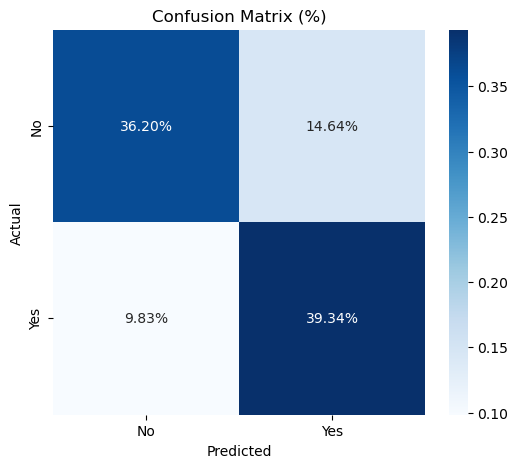

In [104]:

# Initialize Gradient Boosting Classifier
gbrt = GradientBoostingClassifier(random_state=52)

sampling_smote = [
    ('smote', SMOTE(sampling_strategy=1.0, random_state=25))     
]

classification_sampling(gbrt, sampling_smote)